# Análisis de imágenes de rayos X para la detección de fracturas óseas y otro tipo de elementos

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import yaml
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import shutil
! pip install ultralytics
from ultralytics import YOLO
import cv2
import torch
print(torch.backends.mps.is_available())



print("Libraries imported successfully.")

True
Libraries imported successfully.


In [4]:
# Cambia la ruta a tu carpeta de imágenes
import glob

train_images = glob.glob('/Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/train/images')
val_images = glob.glob('/Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/valid/images')

print(f"Train images: {len(train_images)}")
print(f"Val images: {len(val_images)}")

Train images: 1
Val images: 1


In [10]:
def show_image_with_labels_unique_class(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        line = f.readline().strip()
        if not line:
            print("Archivo de etiquetas vacío.")
            return
        parts = line.split()

    class_id = int(parts[0])
    coords = list(map(float, parts[1:]))

    if len(coords) % 4 != 0:
        print(f"Warning: coordenadas no múltiplo de 4, tiene {len(coords)} elementos.")
        return

    for i in range(0, len(coords), 4):
        x_center = coords[i]
        y_center = coords[i+1]
        width = coords[i+2]
        height = coords[i+3]

        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f"Class {class_id}", (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

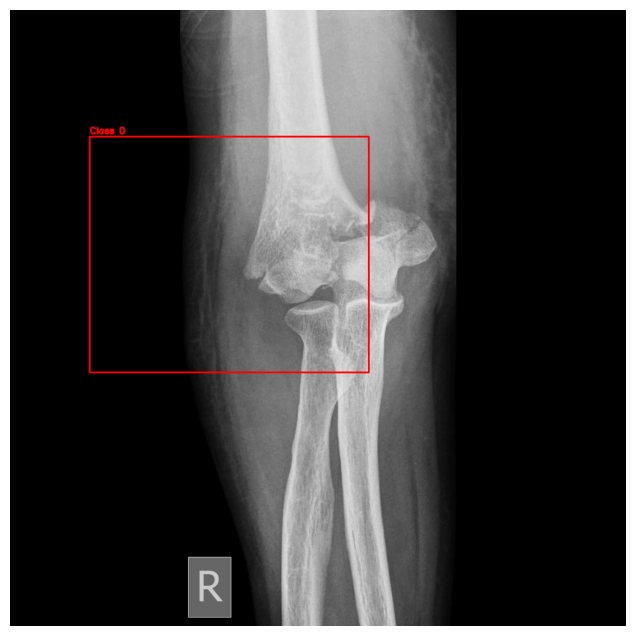

In [12]:
show_image_with_labels_multi(
    '/Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg', 
    '/Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/train/labels/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.txt'
)

In [17]:
import torch
print("MPS disponible:", torch.backends.mps.is_available())
print("MPS compilado:", torch.backends.mps.is_built())

MPS disponible: True
MPS compilado: True


In [19]:
print("Estoy en:", os.getcwd())

Estoy en: /Users/jalonso/Desktop/KSchool-TFM


In [2]:
from ultralytics import YOLO
import torch

# Seleccionar dispositivo
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

print(f"Entrenando en: {device}")

model = YOLO('yolov8n.pt')

result = model.train(data='/Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/data.yaml',
    epochs=50,
    imgsz=460,
    batch=24,
    cache='disk',
    device='mps',
    patience=300, 
)

Entrenando en: mps
Ultralytics 8.3.163 🚀 Python-3.12.7 torch-2.7.0 MPS (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=460, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train23, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

train: Scanning /Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/train/labels.cache... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:00<?, ?it/s]
train: Caching images (2.0GB Disk): 100%|██████████| 3631/3631 [00:00<00:00, 91371.44it/s]

val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 70.3±36.5 MB/s, size: 13.3 KB)



val: Scanning /Users/jalonso/Desktop/KSchool-TFM/Bone fracture images/BoneFractureYolo8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]
val: Caching images (0.2GB Disk): 100%|██████████| 348/348 [00:00<00:00, 153321.20it/s]


Plotting labels to runs/detect/train23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 0 dataloader workers
Logging results to runs/detect/train23
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       3.2G      2.908      5.792      2.185         11        480: 100%|██████████| 152/152 [02:46<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:10<01:12, 10.40s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:19<00:58,  9.76s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:25<00:40,  8.13s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:33<00:32,  8.03s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:39<00:21,  7.20s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:45<00:13,  6.78s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [00:58<00:08,  8.69s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:07<00:00,  8.39s/it]

                   all        348        204   0.000738      0.104    0.00772    0.00403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.29G      2.564      4.554        1.9          4        480: 100%|██████████| 152/152 [03:42<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:07<00:51,  7.34s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:13<00:38,  6.37s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:20<00:33,  6.75s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:26<00:26,  6.53s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:33<00:19,  6.62s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:38<00:12,  6.33s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [00:47<00:07,  7.14s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:51<00:00,  6.46s/it]

                   all        348        204    0.00221      0.101    0.00874    0.00248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.3G      2.539      3.973      1.935          4        480: 100%|██████████| 152/152 [03:53<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:09<01:08,  9.85s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:16<00:46,  7.71s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:24<00:40,  8.08s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:33<00:33,  8.38s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:41<00:24,  8.11s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:47<00:15,  7.58s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [00:56<00:08,  8.16s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:01<00:00,  7.66s/it]

                   all        348        204      0.694    0.00926     0.0076    0.00272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       3.3G      2.488      3.632      1.909          9        480: 100%|██████████| 152/152 [04:18<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:08<01:02,  8.98s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:15<00:45,  7.58s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:26<00:44,  8.98s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:34<00:35,  8.81s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:44<00:27,  9.25s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:54<00:18,  9.29s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:03<00:09,  9.26s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:06<00:00,  8.36s/it]

                   all        348        204      0.256     0.0151     0.0141    0.00666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.22G      2.425       3.34      1.868         17        480: 100%|██████████| 152/152 [05:13<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:10<01:13, 10.56s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:17<00:49,  8.19s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:26<00:44,  8.97s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:36<00:36,  9.25s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:46<00:28,  9.44s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:55<00:18,  9.14s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:02<00:08,  8.66s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:07<00:00,  8.43s/it]

                   all        348        204      0.566     0.0286     0.0188    0.00754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.22G      2.388      3.102      1.818         10        480: 100%|██████████| 152/152 [05:22<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:08<00:59,  8.46s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:16<00:47,  7.93s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:25<00:43,  8.75s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:34<00:35,  8.91s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:42<00:25,  8.39s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:51<00:17,  8.57s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [00:58<00:08,  8.09s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:02<00:00,  7.81s/it]

                   all        348        204      0.382     0.0387     0.0324      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.22G       2.33      3.056      1.808          7        480: 100%|██████████| 152/152 [06:47<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:14<01:38, 14.05s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:21<01:00, 10.07s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:28<00:43,  8.67s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:33<00:29,  7.47s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:42<00:23,  7.71s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:48<00:14,  7.21s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:01<00:09,  9.24s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:07<00:00,  8.45s/it]

                   all        348        204      0.452     0.0325     0.0284    0.00933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.21G      2.282      2.863       1.77          6        480: 100%|██████████| 152/152 [06:27<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:10<01:10, 10.07s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:16<00:47,  7.86s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:28<00:49,  9.98s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:39<00:40, 10.20s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:51<00:32, 10.93s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:01<00:21, 10.54s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:11<00:10, 10.23s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:16<00:00,  9.54s/it]

                   all        348        204      0.434     0.0366     0.0325     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.22G      2.238      2.769      1.748          5        480: 100%|██████████| 152/152 [08:01<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:11<01:23, 11.87s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:18<00:51,  8.62s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:29<00:48,  9.66s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:37<00:36,  9.20s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:51<00:33, 11.06s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:04<00:22, 11.42s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:15<00:11, 11.44s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:20<00:00, 10.06s/it]

                   all        348        204      0.397      0.046     0.0381     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.23G        2.2      2.707      1.721         10        480: 100%|██████████| 152/152 [09:02<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:10<01:10, 10.07s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:23<01:11, 11.96s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:32<00:53, 10.69s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:41<00:40, 10.20s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:53<00:31, 10.56s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:59<00:18,  9.25s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:12<00:10, 10.20s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:16<00:00,  9.62s/it]

                   all        348        204      0.317     0.0611      0.042     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.23G      2.183      2.684      1.701          6        480: 100%|██████████| 152/152 [07:19<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:11<01:23, 12.00s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:19<00:54,  9.09s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:28<00:46,  9.38s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:39<00:39,  9.86s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:49<00:29,  9.92s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:56<00:17,  8.99s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:03<00:08,  8.45s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:08<00:00,  8.57s/it]

                   all        348        204      0.326     0.0508     0.0468     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.23G      2.146      2.563      1.663          9        480: 100%|██████████| 152/152 [07:58<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:07<00:51,  7.42s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:17<00:52,  8.79s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:26<00:44,  8.83s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:32<00:30,  7.70s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:42<00:26,  8.77s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:51<00:17,  8.81s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:04<00:10, 10.13s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:08<00:00,  8.53s/it]

                   all        348        204      0.476     0.0582     0.0475     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.23G      2.124      2.461      1.671          7        480: 100%|██████████| 152/152 [07:45<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:09<01:04,  9.23s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:16<00:47,  7.90s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:30<00:53, 10.70s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:39<00:39,  9.95s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:49<00:30, 10.17s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:00<00:20, 10.40s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:10<00:10, 10.36s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:21<00:00, 10.14s/it]

                   all        348        204      0.101     0.0464     0.0434     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.23G      2.094      2.391      1.633          6        480: 100%|██████████| 152/152 [15:59<00:00,  6.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:15<01:45, 15.09s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:21<01:01, 10.18s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:29<00:44,  8.91s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:37<00:34,  8.63s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:49<00:29,  9.80s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:00<00:20, 10.24s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:17<00:12, 12.43s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:23<00:00, 10.42s/it]

                   all        348        204      0.253     0.0789     0.0649     0.0247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.23G      2.077      2.318      1.615          8        480: 100%|██████████| 152/152 [09:48<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:14<01:41, 14.44s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:24<01:10, 11.75s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:32<00:51, 10.21s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:41<00:38,  9.72s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:53<00:31, 10.38s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:02<00:20, 10.05s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:10<00:09,  9.34s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:16<00:00,  9.52s/it]

                   all        348        204      0.251     0.0862     0.0741     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.31G      2.032      2.293      1.603          7        480: 100%|██████████| 152/152 [12:32<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:05<00:39,  5.67s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:12<00:38,  6.42s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:19<00:32,  6.53s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:29<00:32,  8.10s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:38<00:25,  8.45s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:48<00:17,  8.75s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:01<00:10, 10.10s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:04<00:00,  8.08s/it]

                   all        348        204      0.115     0.0721      0.065     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.23G      2.023       2.23      1.593          9        480: 100%|██████████| 152/152 [11:21<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:12<01:29, 12.71s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:22<01:05, 10.97s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:32<00:51, 10.36s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:45<00:46, 11.68s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:58<00:36, 12.10s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:09<00:23, 11.53s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:24<00:00, 10.55s/it]

                   all        348        204      0.366     0.0615     0.0509     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.23G      1.994      2.201      1.555          6        480: 100%|██████████| 152/152 [16:56<00:00,  6.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:14<01:43, 14.77s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:22<01:04, 10.69s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:37<01:02, 12.49s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:50<00:51, 12.99s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:01<00:35, 12.00s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:11<00:22, 11.36s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:21<00:11, 11.12s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:27<00:00, 10.92s/it]

                   all        348        204      0.197     0.0985      0.089     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.23G      1.948      2.085      1.529          9        480: 100%|██████████| 152/152 [26:29<00:00, 10.46s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:20<02:26, 20.98s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:47<02:26, 24.50s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:13<02:05, 25.03s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:35<01:35, 23.96s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:58<01:10, 23.34s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [02:22<00:47, 23.71s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [03:03<00:29, 29.25s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:13<00:00, 24.17s/it]

                   all        348        204      0.242     0.0808      0.064     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.23G      1.925      2.031      1.522          7        480: 100%|██████████| 152/152 [1:20:38<00:00, 31.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:08<00:58,  8.43s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:17<00:53,  8.99s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:30<00:52, 10.59s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:41<00:42, 10.64s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:56<00:37, 12.35s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:07<00:23, 11.84s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:34<00:00, 11.86s/it]

                   all        348        204      0.173      0.148     0.0817     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.23G      1.919      2.002      1.517         10        480: 100%|██████████| 152/152 [1:17:41<00:00, 30.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:12<01:25, 12.17s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:28<01:27, 14.63s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:03<00:37, 12.59s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:18<00:26, 13.14s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:29<00:12, 12.56s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:37<00:00, 12.25s/it]

                   all        348        204      0.249      0.211      0.152     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.23G      1.886      1.951      1.483         11        480: 100%|██████████| 152/152 [1:12:59<00:00, 28.81s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:21<00:55, 18.38s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:01<00:00, 22.69s/it]

                   all        348        204      0.197       0.28      0.213     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.23G      1.871      1.888       1.48          7        480: 100%|██████████| 152/152 [1:36:34<00:00, 38.12s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [01:46<12:28, 106.92s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [10:29<35:07, 351.30s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [24:29<47:52, 574.56s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [24:46<23:37, 354.47s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [26:29<05:58, 179.12s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [27:08<00:00, 203.52s/it]

                   all        348        204      0.235      0.196      0.139     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.23G      1.845      1.843      1.455         10        480: 100%|██████████| 152/152 [1:31:32<00:00, 36.13s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [00:38<00:36,  9.00s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:47<00:26,  8.96s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [00:56<00:17,  8.87s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:23<00:00, 10.46s/it]

                   all        348        204      0.267      0.237      0.179     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.23G       1.79      1.797      1.442          9        480: 100%|██████████| 152/152 [1:06:54<00:00, 26.41s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [09:51<1:08:57, 591.01s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [24:07<13:05, 261.97s/it]  

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [42:04<00:00, 315.58s/it]

                   all        348        204      0.312      0.286       0.23     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.24G      1.795      1.717      1.439          9        480: 100%|██████████| 152/152 [1:52:26<00:00, 44.38s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [00:52<00:33, 11.12s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [08:33<02:51, 85.51s/it]


KeyboardInterrupt: 